# 04 – Advanced Ensemble and Boosting Methods
     Bias Reduction, Variance Control, and Sequential Learning
     

## Objective

This notebook provides an advanced treatment of **ensemble learning**, with emphasis on:

- Bagging vs Boosting
- Random Forest vs Gradient Boosting
- AdaBoost
- Bias–variance decomposition
- Regularization in boosting
- Practical tuning strategies

It answers:

**Why do ensembles dominate tabular ML, and how do we control their complexity?**

## Ensemble Learning Intuition

Ensembles improve generalization by combining weak learners:

- **Bagging** → variance reduction
- **Boosting** → bias reduction
- **Stacking** → representation learning

Key principle:
> Many imperfect models can outperform one complex model.

## Imports and Dataset


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Superviased-regression/synthetic_customer_ltv_regression_complete.csv")
df.head()

,customer_id,signup_year,signup_month,days_since_signup,tenure_months,avg_monthly_spend,purchase_frequency,discount_sensitivity,returns_rate,email_open_rate,ad_click_rate,loyalty_score,support_tickets,churn_risk_score,credit_score_proxy,customer_lifetime_value
0,1,2022,8,899.094991,29,123.916907,3,0.401322,0.043396,0.042156,0.023647,0.123574,1,0.959716,671.029435,2691.193107
1,2,2019,9,2017.615223,66,204.814055,5,0.266840,0.338968,0.540674,0.180153,0.323954,1,0.789270,746.074773,11690.801889
2,3,2020,3,1720.937794,57,218.905816,3,0.028719,0.041845,0.517227,0.173583,0.268430,2,0.533410,601.164043,13094.093874
3,4,2022,3,1001.962036,33,188.028060,4,0.421602,0.140611,0.512366,0.277571,0.498941,3,0.699054,722.688139,6251.644013
4,5,2018,4,2522.620983,84,142.413565,6,0.192419,0.051116,0.462827,0.123844,0.500634,2,0.439348,659.860235,16474.610236


## Step 1 – Target Definition and Train/Test Split


In [2]:
from sklearn.model_selection import train_test_split

target = "customer_lifetime_value"

X = df.drop(columns=[target, "customer_id"])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Step 2 – Bagging - Random Forest

Random Forest reduces variance via:
- Bootstrap sampling
- Feature subsampling
- Model averaging


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mean_squared_error(y_test, rf_pred, squared=False), r2_score(y_test, rf_pred)


C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(1736.3912683105273), 0.9262954187085144)

## Boosting Fundamentals

Boosting trains models sequentially:
- Each model focuses on previous errors
- Errors are reweighted
- Complexity grows additively

Tradeoff:
- `[pos] - ` Low bias  
- `[neg] - ` Sensitive to noise if poorly regularized


## Step 3 – AdaBoost Regressor

AdaBoost adapts sample weights based on error.


In [4]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

mean_squared_error(y_test, ada_pred, squared=False), r2_score(y_test, ada_pred)


C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(2925.455663971994), 0.7907881219133762)

## Step 4 – Gradient Boosting Regressor

Gradient Boosting fits trees to residual gradients.


In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

mean_squared_error(y_test, gbr_pred, squared=False), r2_score(y_test, gbr_pred)


C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(1128.3420204055217), 0.9688770452937213)

## Bias–Variance Comparison

| Model | Bias | Variance | Stability |
|-----|------|----------|----------|
| Random Forest | Low | Medium | High |
| AdaBoost | Low | Medium–High | Medium |
| Gradient Boosting | Very Low | Controlled | Medium |


## Learning Rate vs Number of Trees

Key Boosting Rule:
> Smaller learning rates require more trees but generalize better.


In [6]:
learning_rates = [0.01, 0.05, 0.1]
results = []

for lr in learning_rates:
    model = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results.append({
        "learning_rate": lr,
        "rmse": mean_squared_error(y_test, pred, squared=False)
    })

pd.DataFrame(results)


C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pantu\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,learning_rate,rmse
0,0.01,2106.223507
1,0.05,1153.535273
2,0.10,1092.493905


## Regularization Knobs in Boosting

- n_estimators → model capacity
- learning_rate → step size
- max_depth → interaction order
- subsample → stochastic regularization
- min_samples_leaf → noise control


## Feature Importance (Boosting)


In [7]:
boost_importance = pd.Series(
    gbr.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

boost_importance


avg_monthly_spend       0.477234
days_since_signup       0.307584
tenure_months           0.077602
purchase_frequency      0.065426
churn_risk_score        0.055332
signup_year             0.009591
loyalty_score           0.003866
returns_rate            0.001407
support_tickets         0.000952
credit_score_proxy      0.000444
ad_click_rate           0.000168
signup_month            0.000155
discount_sensitivity    0.000147
email_open_rate         0.000092
dtype: float64

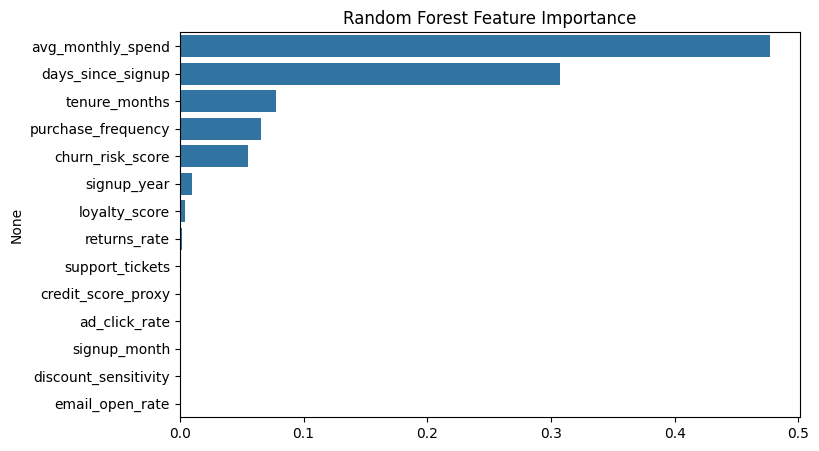

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=boost_importance.values, y=boost_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()


## Limitations of Boosting

- Sensitive to noisy labels
- Harder to interpret
- Slower to train
- Requires careful tuning

## When to Use Which Ensemble

| Scenario | Recommended Model |
|-------|------------------|
| Small noisy data | Random Forest |
| Complex patterns | Gradient Boosting |
| Fast baseline | Random Forest |
| Highest accuracy | Boosting |

## Pipelines (Production-Ready)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

ensemble_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

ensemble_pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

## Common Mistakes (Avoided)

- `[neg] -` Large learning rate + many trees
- `[neg] -` Ignoring subsampling
- `[neg] -` Overfitting noisy targets
- `[neg] -` Blind trust in feature importance


## Key Takeaways

- Bagging controls variance
- Boosting reduces bias
- Regularization is mandatory
- Learning rate is the most important knob
- Ensembles dominate tabular ML for a reason


## Next Notebook

[04_Supervised_Learning/](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

└── [01_linear_and_probabilistic_models.ipynb](../02_classification_models/01_linear_and_probabilistic_models.ipynb)


<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)